In [1]:
import cstarpy
import pandas as pd
import os
import seaborn as sns
import numpy as np
from cstarpy.separation import CellStateTransition

### Read output of SCVI: urothelium cells of cluster 2 and 7

In [2]:
scvi_mouse_2_7_df=pd.read_pickle('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/blca_OUTPUT_mouse_plos/scvi_mouse_2_7_df.pkl')
display(scvi_mouse_2_7_df)

Gene,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
10-GSM5288669_AAACGAATCTTGCAGA-1,0.004894,0.000896,0.000598,0.003601,0.068113,0.000692,1.115041,0.681637,0.003966,1.406160,...,0.000469,0.000311,0.000590,0.000753,0.029990,0.027028,0.518515,0.265761,0.000564,0.034652
13-GSM5288669_AAACGCTGTGTCATCA-1,0.000615,0.000422,0.000623,0.001175,0.103486,0.000560,0.182177,0.478481,0.000575,0.196992,...,0.000519,0.000861,0.000352,0.000626,0.108540,1.758731,0.759839,0.206455,0.000646,0.010886
18-GSM5288669_AAAGGATCATGTTACG-1,0.011390,0.001238,0.001436,0.004526,0.396891,0.001340,0.746602,0.654777,0.005948,1.288181,...,0.000943,0.001685,0.001031,0.000999,0.026468,0.131076,0.805145,0.246584,0.001611,0.026659
24-GSM5288669_AAAGGATTCCACGTGG-1,0.000714,0.000587,0.000616,0.001215,0.074237,0.000717,0.423564,0.603292,0.001688,0.550554,...,0.000893,0.000718,0.000381,0.000927,0.088737,1.160149,1.138795,0.303152,0.000767,0.010334
31-GSM5288669_AAAGGTAAGTGCTCAT-1,0.002147,0.000898,0.000838,0.002069,0.065497,0.001030,0.475137,0.548427,0.004244,0.586181,...,0.001048,0.000703,0.000733,0.001200,0.104045,2.114657,1.256619,0.342947,0.001166,0.027660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758-GSM5288674_TTTGATCGTACGAGCA-1,0.005028,0.001261,0.000986,0.004190,0.025804,0.001029,0.442821,0.454834,0.005206,0.588553,...,0.000932,0.003597,0.001541,0.000746,0.006946,0.093124,1.222257,0.404452,0.001162,0.034507
6762-GSM5288674_TTTGATCGTTGCTGAT-1,0.003914,0.001217,0.000873,0.003381,0.026140,0.001079,0.475397,0.499730,0.007038,0.566634,...,0.000840,0.002868,0.001229,0.000739,0.008424,0.071709,1.852792,0.395854,0.001165,0.025524
6766-GSM5288674_TTTGGAGCACCTTCCA-1,0.001017,0.000315,0.000200,0.000918,0.003857,0.000254,0.480540,0.380089,0.002604,0.462800,...,0.000193,0.000804,0.000256,0.000126,0.007199,0.048478,0.967512,0.260839,0.000237,0.017418
6767-GSM5288674_TTTGGAGCAGACAAAT-1,0.001941,0.000792,0.000661,0.002351,0.034839,0.000731,0.297808,0.456352,0.003772,0.477834,...,0.000642,0.002305,0.000754,0.000597,0.006470,0.074821,1.103736,0.337152,0.000737,0.015575


### Align source and barcodes

In [3]:
scvi_mouse_2_7_df.reset_index(inplace=True)

In [4]:
scvi_mouse_2_7_df

Gene,index,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1
0,10-GSM5288669_AAACGAATCTTGCAGA-1,0.004894,0.000896,0.000598,0.003601,0.068113,0.000692,1.115041,0.681637,0.003966,...,0.000469,0.000311,0.000590,0.000753,0.029990,0.027028,0.518515,0.265761,0.000564,0.034652
1,13-GSM5288669_AAACGCTGTGTCATCA-1,0.000615,0.000422,0.000623,0.001175,0.103486,0.000560,0.182177,0.478481,0.000575,...,0.000519,0.000861,0.000352,0.000626,0.108540,1.758731,0.759839,0.206455,0.000646,0.010886
2,18-GSM5288669_AAAGGATCATGTTACG-1,0.011390,0.001238,0.001436,0.004526,0.396891,0.001340,0.746602,0.654777,0.005948,...,0.000943,0.001685,0.001031,0.000999,0.026468,0.131076,0.805145,0.246584,0.001611,0.026659
3,24-GSM5288669_AAAGGATTCCACGTGG-1,0.000714,0.000587,0.000616,0.001215,0.074237,0.000717,0.423564,0.603292,0.001688,...,0.000893,0.000718,0.000381,0.000927,0.088737,1.160149,1.138795,0.303152,0.000767,0.010334
4,31-GSM5288669_AAAGGTAAGTGCTCAT-1,0.002147,0.000898,0.000838,0.002069,0.065497,0.001030,0.475137,0.548427,0.004244,...,0.001048,0.000703,0.000733,0.001200,0.104045,2.114657,1.256619,0.342947,0.001166,0.027660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,6758-GSM5288674_TTTGATCGTACGAGCA-1,0.005028,0.001261,0.000986,0.004190,0.025804,0.001029,0.442821,0.454834,0.005206,...,0.000932,0.003597,0.001541,0.000746,0.006946,0.093124,1.222257,0.404452,0.001162,0.034507
14631,6762-GSM5288674_TTTGATCGTTGCTGAT-1,0.003914,0.001217,0.000873,0.003381,0.026140,0.001079,0.475397,0.499730,0.007038,...,0.000840,0.002868,0.001229,0.000739,0.008424,0.071709,1.852792,0.395854,0.001165,0.025524
14632,6766-GSM5288674_TTTGGAGCACCTTCCA-1,0.001017,0.000315,0.000200,0.000918,0.003857,0.000254,0.480540,0.380089,0.002604,...,0.000193,0.000804,0.000256,0.000126,0.007199,0.048478,0.967512,0.260839,0.000237,0.017418
14633,6767-GSM5288674_TTTGGAGCAGACAAAT-1,0.001941,0.000792,0.000661,0.002351,0.034839,0.000731,0.297808,0.456352,0.003772,...,0.000642,0.002305,0.000754,0.000597,0.006470,0.074821,1.103736,0.337152,0.000737,0.015575


In [5]:
scvi_mouse_2_7_df[['Source','Barcodes']]=scvi_mouse_2_7_df['index'].str.split('_', expand=True)

In [6]:
scvi_mouse_2_7_df[['Index_num','Source']]=scvi_mouse_2_7_df['Source'].str.split('-', expand=True)

In [7]:
scvi_mouse_2_7_df['index_clean']=scvi_mouse_2_7_df['Source']+'_'+scvi_mouse_2_7_df['Barcodes']

In [8]:
scvi_mouse_2_7_df.set_index(scvi_mouse_2_7_df['index_clean'],inplace=True)

In [9]:
scvi_mouse_2_7_df.drop(columns=['index','Index_num'],inplace=True)

In [10]:
scvi_mouse_2_7_df.drop(columns=['Barcodes','index_clean'],inplace=True)


In [11]:
scvi_mouse_2_7_df

Gene,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,AC149090.1,CAAA01118383.1,Vmn2r122,CAAA01147332.1,Source
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5288669_AAACGAATCTTGCAGA-1,0.004894,0.000896,0.000598,0.003601,0.068113,0.000692,1.115041,0.681637,0.003966,1.406160,...,0.000311,0.000590,0.000753,0.029990,0.027028,0.518515,0.265761,0.000564,0.034652,GSM5288669
GSM5288669_AAACGCTGTGTCATCA-1,0.000615,0.000422,0.000623,0.001175,0.103486,0.000560,0.182177,0.478481,0.000575,0.196992,...,0.000861,0.000352,0.000626,0.108540,1.758731,0.759839,0.206455,0.000646,0.010886,GSM5288669
GSM5288669_AAAGGATCATGTTACG-1,0.011390,0.001238,0.001436,0.004526,0.396891,0.001340,0.746602,0.654777,0.005948,1.288181,...,0.001685,0.001031,0.000999,0.026468,0.131076,0.805145,0.246584,0.001611,0.026659,GSM5288669
GSM5288669_AAAGGATTCCACGTGG-1,0.000714,0.000587,0.000616,0.001215,0.074237,0.000717,0.423564,0.603292,0.001688,0.550554,...,0.000718,0.000381,0.000927,0.088737,1.160149,1.138795,0.303152,0.000767,0.010334,GSM5288669
GSM5288669_AAAGGTAAGTGCTCAT-1,0.002147,0.000898,0.000838,0.002069,0.065497,0.001030,0.475137,0.548427,0.004244,0.586181,...,0.000703,0.000733,0.001200,0.104045,2.114657,1.256619,0.342947,0.001166,0.027660,GSM5288669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5288674_TTTGATCGTACGAGCA-1,0.005028,0.001261,0.000986,0.004190,0.025804,0.001029,0.442821,0.454834,0.005206,0.588553,...,0.003597,0.001541,0.000746,0.006946,0.093124,1.222257,0.404452,0.001162,0.034507,GSM5288674
GSM5288674_TTTGATCGTTGCTGAT-1,0.003914,0.001217,0.000873,0.003381,0.026140,0.001079,0.475397,0.499730,0.007038,0.566634,...,0.002868,0.001229,0.000739,0.008424,0.071709,1.852792,0.395854,0.001165,0.025524,GSM5288674
GSM5288674_TTTGGAGCACCTTCCA-1,0.001017,0.000315,0.000200,0.000918,0.003857,0.000254,0.480540,0.380089,0.002604,0.462800,...,0.000804,0.000256,0.000126,0.007199,0.048478,0.967512,0.260839,0.000237,0.017418,GSM5288674


### Retrieve converted mouse-human matrix

In [12]:
m_h_genes =pd.read_pickle("/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_m_h_convert/m_h_genes.pkl")

In [13]:
m_h_genes.set_index('Gene',inplace=True)

In [14]:
m_h_genes

,Human_Genes
Gene,
4933427D14Rik,KIAA0753
Aars,AARS
Abcb6,ABCB6
Abcc5,ABCC5
Abcf1,ABCF1
...,...
Zfp36,ZFP36
Zfp451,ZNF451
Zmiz1,ZMIZ1


In [15]:
scvi_mouse_2_7_df_lm=scvi_mouse_2_7_df[m_h_genes.index]

In [16]:
scvi_mouse_2_7_df_lm.columns=m_h_genes['Human_Genes']

In [17]:
scvi_mouse_2_7_df_lm

Human_Genes,KIAA0753,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,...,YME1L1,YTHDF1,ZDHHC6,ZNF131,ZNF318,ZFP36,ZNF451,ZMIZ1,ZMYM2,ZW10
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5288669_AAACGAATCTTGCAGA-1,0.216547,0.453301,0.034607,0.664768,1.665539,0.183180,0.285411,0.129905,0.291489,0.517360,...,1.127891,0.490947,0.377983,0.600205,0.279086,0.831234,0.659701,1.044334,0.474424,0.304039
GSM5288669_AAACGCTGTGTCATCA-1,0.109030,0.419066,0.025318,0.781095,0.407456,0.096495,0.239389,0.193172,0.103034,0.591694,...,0.578957,0.168413,0.149513,0.186822,0.032600,3.227809,0.086363,0.717161,0.188933,0.072114
GSM5288669_AAAGGATCATGTTACG-1,0.174566,0.643476,0.034134,0.387555,1.590052,0.253230,0.317208,0.112885,0.371056,0.578980,...,0.957291,0.543741,0.348747,0.590839,0.297246,1.644725,0.516603,1.142021,0.462682,0.257260
GSM5288669_AAAGGATTCCACGTGG-1,0.087536,0.377407,0.029094,1.114654,0.947921,0.181873,0.401760,0.362594,0.142644,0.916783,...,0.838225,0.287477,0.219329,0.432977,0.069916,3.740024,0.207669,0.825734,0.308538,0.106901
GSM5288669_AAAGGTAAGTGCTCAT-1,0.103944,0.429469,0.024642,0.918151,0.982937,0.225395,0.321756,0.373416,0.134059,0.898446,...,1.029046,0.244309,0.262538,0.308534,0.073734,2.152761,0.217962,0.870645,0.349387,0.120320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5288674_TTTGATCGTACGAGCA-1,0.055920,0.252522,0.049107,0.224320,0.684951,0.187733,0.367466,0.502470,0.146510,0.905777,...,0.554142,0.241795,0.446989,0.244498,0.168149,1.662377,0.253530,0.421109,0.242271,0.072472
GSM5288674_TTTGATCGTTGCTGAT-1,0.059179,0.163577,0.044286,0.337747,0.761749,0.203503,0.341109,0.364393,0.170829,1.138001,...,0.598570,0.225656,0.406524,0.236583,0.184539,1.215318,0.262564,0.401370,0.249627,0.087625
GSM5288674_TTTGGAGCACCTTCCA-1,0.026918,0.098963,0.030515,0.144638,0.530010,0.119324,0.223442,0.304667,0.083243,0.966223,...,0.332697,0.140747,0.274268,0.110291,0.061880,0.341409,0.111922,0.193804,0.103774,0.051653


In [18]:
#scvi_mouse_2_7_df_lm.to_pickle('/home/jing/Desktop/scvi_mouse_2_7_df_lm_full.pkl')

## Separation SVM

In [19]:
NMIBC=scvi_mouse_2_7_df[(scvi_mouse_2_7_df['Source']=='GSM5288668')|(scvi_mouse_2_7_df['Source']=='GSM5288669')]

In [20]:
NMIBC_df =NMIBC[m_h_genes.index]
NMIBC_df.columns=m_h_genes['Human_Genes']
display(NMIBC_df)

Human_Genes,KIAA0753,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,...,YME1L1,YTHDF1,ZDHHC6,ZNF131,ZNF318,ZFP36,ZNF451,ZMIZ1,ZMYM2,ZW10
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5288669_AAACGAATCTTGCAGA-1,0.216547,0.453301,0.034607,0.664768,1.665539,0.183180,0.285411,0.129905,0.291489,0.517360,...,1.127891,0.490947,0.377983,0.600205,0.279086,0.831234,0.659701,1.044334,0.474424,0.304039
GSM5288669_AAACGCTGTGTCATCA-1,0.109030,0.419066,0.025318,0.781095,0.407456,0.096495,0.239389,0.193172,0.103034,0.591694,...,0.578957,0.168413,0.149513,0.186822,0.032600,3.227809,0.086363,0.717161,0.188933,0.072114
GSM5288669_AAAGGATCATGTTACG-1,0.174566,0.643476,0.034134,0.387555,1.590052,0.253230,0.317208,0.112885,0.371056,0.578980,...,0.957291,0.543741,0.348747,0.590839,0.297246,1.644725,0.516603,1.142021,0.462682,0.257260
GSM5288669_AAAGGATTCCACGTGG-1,0.087536,0.377407,0.029094,1.114654,0.947921,0.181873,0.401760,0.362594,0.142644,0.916783,...,0.838225,0.287477,0.219329,0.432977,0.069916,3.740024,0.207669,0.825734,0.308538,0.106901
GSM5288669_AAAGGTAAGTGCTCAT-1,0.103944,0.429469,0.024642,0.918151,0.982937,0.225395,0.321756,0.373416,0.134059,0.898446,...,1.029046,0.244309,0.262538,0.308534,0.073734,2.152761,0.217962,0.870645,0.349387,0.120320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5288668_TTTGACTGTGATACTC-1,0.073531,0.438038,0.034620,0.420075,1.104743,0.264967,0.458387,0.256233,0.169650,0.960600,...,0.606946,0.451139,0.251328,0.430816,0.110628,4.089460,0.205397,0.647776,0.280815,0.093642
GSM5288668_TTTGACTGTTAGAGAT-1,0.044384,0.197458,0.036847,0.751500,0.607017,0.123242,0.512329,0.279928,0.108572,0.849637,...,0.426142,0.249167,0.199321,0.280546,0.034357,4.061303,0.111902,0.468462,0.150397,0.053829
GSM5288668_TTTGGAGTCCTAAGTG-1,0.032733,0.274191,0.034024,0.546607,0.523052,0.151097,0.464638,0.352834,0.066841,1.003242,...,0.416936,0.211633,0.204749,0.192576,0.025866,3.019046,0.062359,0.406393,0.100271,0.048757


In [21]:
MIBC=scvi_mouse_2_7_df[(scvi_mouse_2_7_df['Source']=='GSM5288670')|(scvi_mouse_2_7_df['Source']=='GSM5288671')]
MIBC_df =MIBC[m_h_genes.index]
MIBC_df.columns=m_h_genes['Human_Genes']
display(MIBC_df)

Human_Genes,KIAA0753,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,...,YME1L1,YTHDF1,ZDHHC6,ZNF131,ZNF318,ZFP36,ZNF451,ZMIZ1,ZMYM2,ZW10
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5288670_AAACCCAAGCTAGATA-1,0.190661,0.378595,0.033523,0.723064,1.192044,0.202402,0.308250,0.118355,0.406566,0.519758,...,1.109603,0.517318,0.376614,0.615841,0.538221,3.270264,0.700178,1.583764,0.722978,0.158742
GSM5288670_AAACCCAAGTATAACG-1,0.055217,0.501509,0.009047,0.212752,0.279508,0.069770,0.165711,0.117335,0.056725,0.336730,...,0.418217,0.137624,0.082594,0.098425,0.046756,9.533557,0.027391,0.871325,0.112082,0.028769
GSM5288670_AAACGAAAGGTAGCCA-1,0.133793,0.350963,0.041812,0.514239,1.230169,0.197552,0.239596,0.151261,0.263033,0.636702,...,0.990024,0.375855,0.466741,0.383611,0.268518,1.054654,0.538878,0.939798,0.433958,0.159235
GSM5288670_AAACGAACACACACGC-1,0.082106,0.222251,0.009476,0.474308,0.516598,0.077887,0.220729,0.142652,0.108458,0.315186,...,0.641276,0.169144,0.150981,0.201279,0.032513,2.061894,0.142832,0.998249,0.239494,0.069465
GSM5288670_AAACGAACACTTCCTG-1,0.108118,0.329161,0.037875,0.287003,1.594970,0.136334,0.162925,0.103709,0.217756,0.392219,...,0.924249,0.458650,0.485510,0.386368,0.188786,0.447301,0.510756,0.634196,0.367572,0.186452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5288671_TTTGTTGCACAGTATC-1,0.141795,0.339529,0.034606,0.753096,1.027858,0.202206,0.340808,0.305115,0.168073,0.791205,...,1.162059,0.313380,0.344275,0.352988,0.092550,2.106396,0.363206,0.959209,0.436304,0.161644
GSM5288671_TTTGTTGCACGACGAA-1,0.070633,0.144366,0.027575,0.361417,0.622140,0.102722,0.313651,0.148671,0.130903,0.506993,...,0.485202,0.265097,0.213171,0.286616,0.104039,1.999434,0.246722,0.669254,0.223190,0.070802
GSM5288671_TTTGTTGGTGAGACCA-1,0.158463,1.215381,0.040567,0.289635,1.143036,0.220866,0.263929,0.290329,0.275538,0.520244,...,1.266817,0.549815,0.384254,0.379061,0.110695,1.658492,0.331289,1.112094,0.485873,0.234901


In [22]:
HA=scvi_mouse_2_7_df[(scvi_mouse_2_7_df['Source']=='GSM5288672')|(scvi_mouse_2_7_df['Source']=='GSM5288674')]
HA_df =HA[m_h_genes.index]
HA_df.columns=m_h_genes['Human_Genes']
display(HA_df)

Human_Genes,KIAA0753,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,...,YME1L1,YTHDF1,ZDHHC6,ZNF131,ZNF318,ZFP36,ZNF451,ZMIZ1,ZMYM2,ZW10
index_clean,,,,,,,,,,,,,,,,,,,,,
GSM5288672_AAACCCACAGCTATTG-1,0.082038,0.363729,0.024304,0.216201,1.132720,0.227534,0.184977,0.131165,0.084730,1.858879,...,0.483786,0.217424,0.342673,0.113241,0.053019,0.259397,0.142551,0.349044,0.113070,0.113695
GSM5288672_AAACCCATCTTCCGTG-1,0.137159,0.326017,0.025253,0.358379,1.305734,0.243974,0.277808,0.072609,0.247974,0.575261,...,0.726256,0.399188,0.292440,0.439677,0.386095,1.265908,0.457365,0.827172,0.447998,0.158210
GSM5288672_AAACGAAAGCGTCTCG-1,0.133200,0.401005,0.013887,0.323094,1.431327,0.319884,0.371382,0.172111,0.132540,1.915743,...,0.860276,0.399044,0.259593,0.244820,0.100298,1.175820,0.282245,0.802797,0.343205,0.271345
GSM5288672_AAAGAACCACTCTAGA-1,0.094414,0.355715,0.033447,0.435044,1.117027,0.234535,0.327999,0.236062,0.179976,1.049550,...,0.667799,0.341439,0.250529,0.349164,0.134094,2.642528,0.264623,0.753784,0.324906,0.120656
GSM5288672_AAAGGGCAGTCTGTAC-1,0.074256,0.325435,0.042046,0.346200,0.967977,0.183371,0.238394,0.236183,0.127741,1.484843,...,0.599720,0.213157,0.329289,0.178039,0.114994,1.027632,0.224516,0.508463,0.196924,0.159612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5288674_TTTGATCGTACGAGCA-1,0.055920,0.252522,0.049107,0.224320,0.684951,0.187733,0.367466,0.502470,0.146510,0.905777,...,0.554142,0.241795,0.446989,0.244498,0.168149,1.662377,0.253530,0.421109,0.242271,0.072472
GSM5288674_TTTGATCGTTGCTGAT-1,0.059179,0.163577,0.044286,0.337747,0.761749,0.203503,0.341109,0.364393,0.170829,1.138001,...,0.598570,0.225656,0.406524,0.236583,0.184539,1.215318,0.262564,0.401370,0.249627,0.087625
GSM5288674_TTTGGAGCACCTTCCA-1,0.026918,0.098963,0.030515,0.144638,0.530010,0.119324,0.223442,0.304667,0.083243,0.966223,...,0.332697,0.140747,0.274268,0.110291,0.061880,0.341409,0.111922,0.193804,0.103774,0.051653


In [23]:
ONC=pd.concat([MIBC_df,NMIBC_df])


In [24]:
cst = CellStateTransition('inv', NMIBC_df, MIBC_df)

dpd_scores = cst.get_dpd()

In [25]:
norm_s_df = pd.DataFrame(np.stack([cst.n, cst.s], axis=1), index=cst.svm_input.data.columns, columns=["n", "s"])

In [26]:
#Save docuemnt
#norm_s_df.to_csv('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/blca_OUTPUT_scvi_STV_NMIBC.csv')

In [27]:
cst_onc = CellStateTransition('onc',HA_df, ONC)
dpd_onc_scores=cst_onc.get_dpd()
dpd_onc_scores

,DPD_onc
index_clean,
GSM5288672_AAACCCACAGCTATTG-1,-0.345891
GSM5288672_AAACCCATCTTCCGTG-1,-0.357937
GSM5288672_AAACGAAAGCGTCTCG-1,-0.782907
GSM5288672_AAAGAACCACTCTAGA-1,-0.320959
GSM5288672_AAAGGGCAGTCTGTAC-1,-0.499368
...,...
GSM5288668_TTTGACTGTGATACTC-1,0.778444
GSM5288668_TTTGACTGTTAGAGAT-1,0.688105
GSM5288668_TTTGGAGTCCTAAGTG-1,0.688701


In [28]:
norm_s_onc_df = pd.DataFrame(np.stack([cst_onc.n, cst_onc.s], axis=1), index=cst_onc.svm_input.data.columns, columns=["n", "s"])

In [29]:
STVs_df =pd.DataFrame(np.stack([norm_s_df['n'],norm_s_onc_df['n']],axis=1),index=cst_onc.svm_input.data.columns, columns=["STV_NMIBC", "STV_ONC_HA"])

In [30]:
#Save file
# STVs_df.to_csv('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/blca_OUTPUT_scvi_STVs.csv')

In [31]:
data_all_cells = cst_onc.svm_input.data
DPD_invasive = cst.get_dpd(data_all_cells)
DPD_onc = cst_onc.get_dpd(data_all_cells)
DPD_all = pd.concat([DPD_invasive, DPD_onc], axis=1)

In [32]:
DPD_all

,DPD_inv,DPD_onc
index_clean,,
GSM5288672_AAACCCACAGCTATTG-1,0.140101,-0.345891
GSM5288672_AAACCCATCTTCCGTG-1,0.281372,-0.357937
GSM5288672_AAACGAAAGCGTCTCG-1,0.494113,-0.782907
GSM5288672_AAAGAACCACTCTAGA-1,0.134677,-0.320959
GSM5288672_AAAGGGCAGTCTGTAC-1,0.139371,-0.499368
...,...,...
GSM5288668_TTTGACTGTGATACTC-1,-0.920141,0.778444
GSM5288668_TTTGACTGTTAGAGAT-1,-0.238046,0.688105
GSM5288668_TTTGGAGTCCTAAGTG-1,-0.143029,0.688701


In [33]:
DPD_all_df=DPD_all
DPD_all_df.reset_index(inplace=True)

In [34]:
DPD_all_df[['Source','Barcodes']]=DPD_all_df['index_clean'].str.split('_',expand=True)

In [41]:
DPD_all_df['Annotation']='Normal'

In [43]:
DPD_all_df.set_index('index_clean',inplace=True)

In [48]:
DPD_all_df.loc[DPD_all_df['Source'].str.contains('GSM5288670'),'Annotation']='MIBC'
DPD_all_df.loc[DPD_all_df['Source'].str.contains('GSM5288671'),'Annotation']='MIBC'
DPD_all_df.loc[DPD_all_df['Source'].str.contains('GSM5288668'),'Annotation']='NMIBC'
DPD_all_df.loc[DPD_all_df['Source'].str.contains('GSM5288669'),'Annotation']='NMIBC'


In [49]:
DPD_all_df

,DPD_inv,DPD_onc,Source,Barcodes,Annotation
index_clean,,,,,
GSM5288672_AAACCCACAGCTATTG-1,0.140101,-0.345891,GSM5288672,AAACCCACAGCTATTG-1,Normal
GSM5288672_AAACCCATCTTCCGTG-1,0.281372,-0.357937,GSM5288672,AAACCCATCTTCCGTG-1,Normal
GSM5288672_AAACGAAAGCGTCTCG-1,0.494113,-0.782907,GSM5288672,AAACGAAAGCGTCTCG-1,Normal
GSM5288672_AAAGAACCACTCTAGA-1,0.134677,-0.320959,GSM5288672,AAAGAACCACTCTAGA-1,Normal
GSM5288672_AAAGGGCAGTCTGTAC-1,0.139371,-0.499368,GSM5288672,AAAGGGCAGTCTGTAC-1,Normal
...,...,...,...,...,...
GSM5288668_TTTGACTGTGATACTC-1,-0.920141,0.778444,GSM5288668,TTTGACTGTGATACTC-1,NMIBC
GSM5288668_TTTGACTGTTAGAGAT-1,-0.238046,0.688105,GSM5288668,TTTGACTGTTAGAGAT-1,NMIBC
GSM5288668_TTTGGAGTCCTAAGTG-1,-0.143029,0.688701,GSM5288668,TTTGGAGTCCTAAGTG-1,NMIBC


In [50]:
#Save document
#DPD_all_df.to_csv('/home/jing/Phd_project/project_UCD_blca/blca_OUTPUT/blca_OUTPUT_scvi/blca_OUTPUT_scvi_DPDs.csv')

## Visualisation

<Axes: xlabel='DPD_inv', ylabel='DPD_onc'>

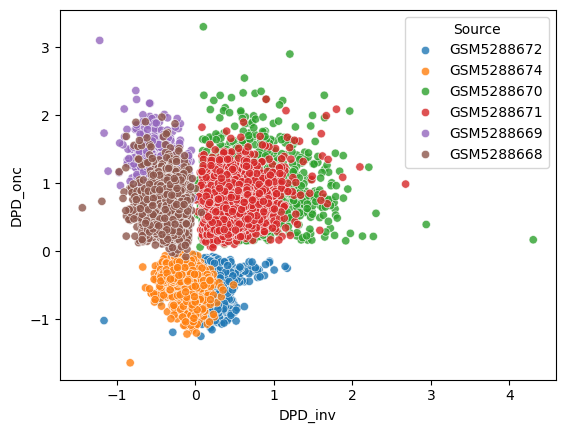

In [37]:
sns.scatterplot(x='DPD_inv',y='DPD_onc',data=DPD_all_df,hue='Source',alpha=0.8)